In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

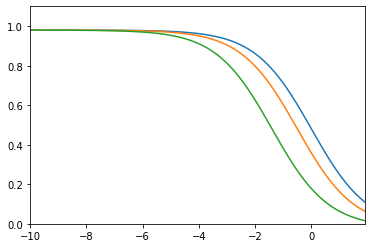

In [18]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# use my_ml

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target


In [22]:
# 取两类， 用两个特征
X = X[y<2, :2]
y = y[y<2]

In [23]:
X.shape

(100, 2)

In [24]:
y.shape

(100,)

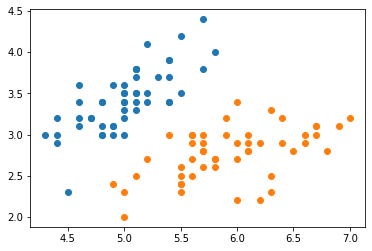

In [25]:
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.show()

In [27]:
from my_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [31]:
from my_ml.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [32]:
log_reg.score(X_test, y_test)

1.0

In [34]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [35]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [36]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [37]:
log_reg.coefficient_

array([ 3.01796521, -5.04447145])

In [38]:
log_reg.interception_

-0.6937719272911225

In [39]:
def x2(x1):
    return (-log_reg.coefficient_[0] * x1 - log_reg.interception_) / log_reg.coefficient_[1]

In [40]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

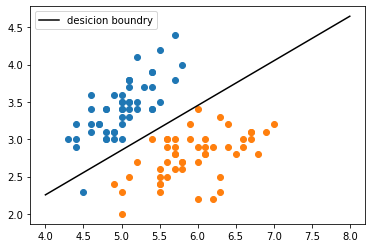

In [43]:
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.plot(x1_plot, x2_plot, color='black', label='desicion boundry')
plt.legend()
plt.show()

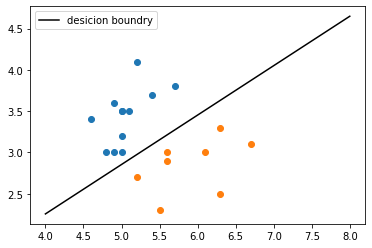

In [44]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0, 1])
plt.scatter(X_test[y_test==1,0], X_test[y_test==1, 1])
plt.plot(x1_plot, x2_plot, color='black', label='desicion boundry')
plt.legend()
plt.show()

In [55]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


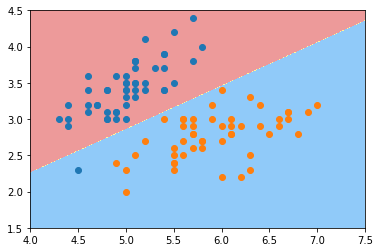

In [56]:
plot_desicion_boundry(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.show()

# KNN的决策边界

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()  # 默认k为5
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

1.0

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


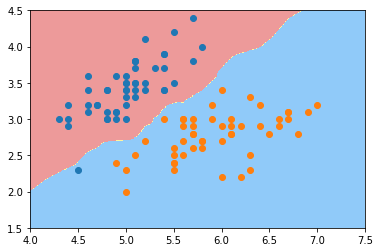

In [61]:
plot_desicion_boundry(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.show()

In [64]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)
# knn_clf_all.score(X_test, y_test)

KNeighborsClassifier()

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


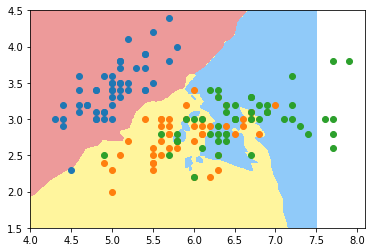

In [65]:
plot_desicion_boundry(knn_clf_all, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2, 1])
plt.show()

In [66]:
knn_clf_all = KNeighborsClassifier(50)
knn_clf_all.fit(iris.data[:, :2], iris.target)
# knn_clf_all.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=50)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


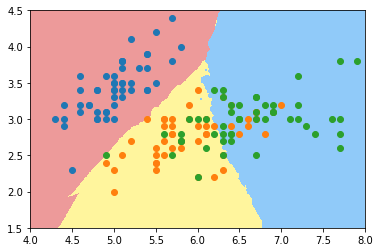

In [67]:
plot_desicion_boundry(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2, 1])
plt.show()